# Calculating Euclidean Distance in Python

In [1]:
# import packages
import numpy as np
import math

In [2]:
# create a distance function
def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0], 2) + math.pow(a[1]-b[1], 2))

In [3]:
# create data points
centroids = [(2, 5), (8, 3), (4, 5)]
x = (0, 8)

In [4]:
# calculate the distance between x and the centroids
centroids_distances = []

for centroid in centroids:
    print(f'Euclidean Distance between x {x} and centroid {centroid} is {dist(x, centroid)}')
    centroids_distances.append(dist(x, centroid))

Euclidean Distance between x (0, 8) and centroid (2, 5) is 3.605551275463989
Euclidean Distance between x (0, 8) and centroid (8, 3) is 9.433981132056603
Euclidean Distance between x (0, 8) and centroid (4, 5) is 5.0


# Forming Clusters with the Notion of Distance

In [5]:
# create a cluster
cluster_1 = [(0, 8), (3, 8), (3, 4)]

In [6]:
# find the centroid
x = 0
y = 0

for point in cluster_1:
    x = x + point[0]
    y = y + point[1]
x = x / len(cluster_1)
y = y / len(cluster_1)

mean = [x, y]
mean

[2.0, 6.666666666666667]

# K-means from scratch

In [7]:
# import packages
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math
np.random.seed(0)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Generate a random cluster dataset to experiment on X = coordinate points, y = cluster labels,
# and define random centroids
X, y = make_blobs(n_samples=1500, # determines the total number of data points generated by the blobs
                  centers=3, # determines the number of centroids
                  n_features=2, # determines the number of dimensions generated by the dataset
                  random_state=800)
centroids = [[-6, 2], [3, -4], [-5, 10]]

In [9]:
# print X
X

array([[-3.83458347,  6.09210705],
       [-4.62571831,  5.54296865],
       [-2.87807159, -7.48754592],
       ...,
       [-3.709726  , -7.77993633],
       [-8.44553266, -1.83519866],
       [-4.68308431,  6.91780744]])

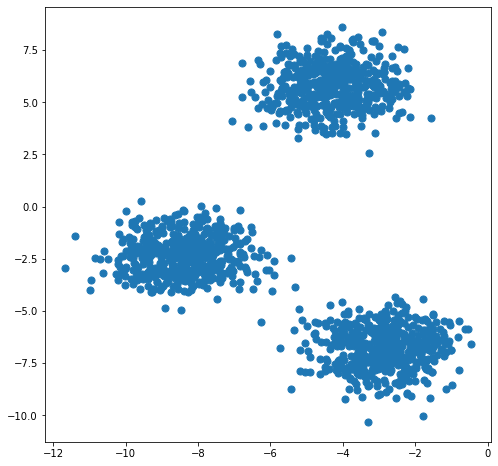

In [10]:
# plotting a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='tab20b')
plt.show()

In [11]:
# print y
y

array([2, 2, 1, ..., 1, 0, 2])

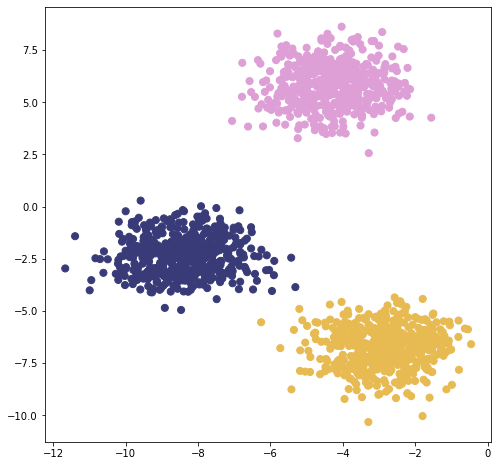

In [12]:
# plot the points with the cluster label
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20b')
plt.show()

Compare a basic implementation of Euclidean distance with an optimized version provided in SciPy

In [13]:
# import distance function from SciPy
from scipy.spatial.distance import cdist

In [14]:
# Identify a subset of X you want to explore
X[105:110]

array([[-3.09897933,  4.79407445],
       [-3.37295914, -7.36901393],
       [-3.372895  ,  5.10433846],
       [-5.90267987, -3.28352194],
       [-3.52067739,  7.7841276 ]])

In [15]:
# Calculate the distance
for x in X[105:110]:
    calcs = cdist(x.reshape([1, -1]), centroids).squeeze()
    print(calcs)
np.argmin(calcs)

[ 4.02775036 10.70202291  5.54216027]
[ 9.7303528   7.20866583 17.44505393]
[ 4.06676751 11.11317999  5.15897011]
[ 5.28441816  8.93146403 13.31415736]
[ 6.29310516 13.46792103  2.66429839]


2

In [16]:
# define the k-means function
def k_means(X, K):
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True:
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [17]:
centers, labels, centers_hist, labels_hist = k_means(X, 3)

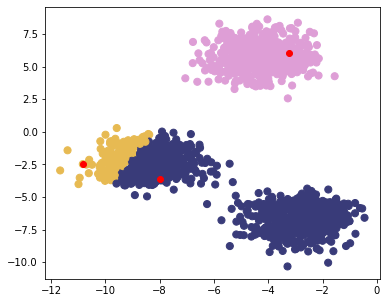

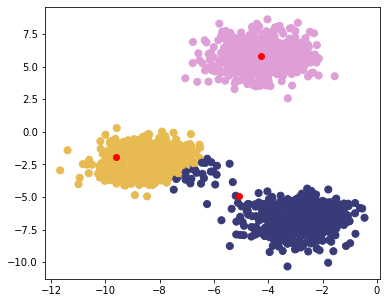

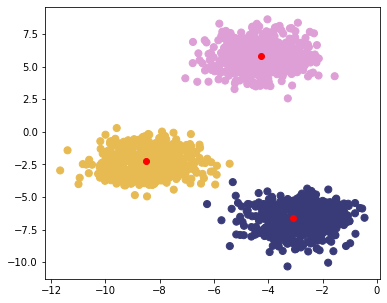

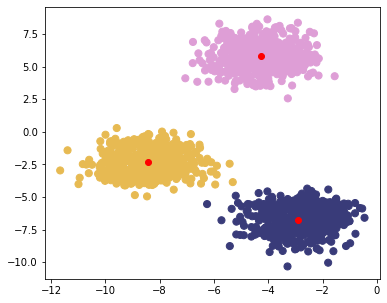

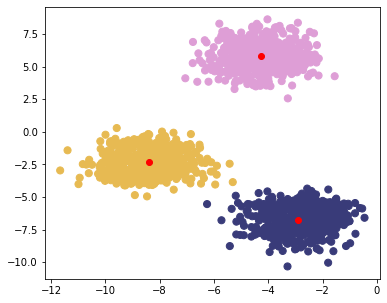

In [18]:
# Zip together the historical steps of centers and their labels
history = zip(centers_hist, labels_hist)
for x, y in history:
    plt.figure(figsize=(6,5))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20b');
    plt.scatter(x[:, 0], x[:, 1], c='red')
    plt.show()

# Calculating the Silhouette Score

In [19]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
np.random.seed(0)

In [20]:
seeds = pd.read_csv('datasets/Seed_Data.csv')
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [21]:
X = seeds.drop(columns=['target'])
X.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [22]:
# Convert our seeds X feature DataFrame into a NumPy matrix
X_mat = X.values

In [23]:
# Run our k_means function on the seeds matrix
centroids, labels, centroids_history, labels_history = k_means(X_mat, 3)

In [24]:
# Calculate the silhouette score for the Area ('A') and Length of Kernel ('LK') columns
silhouette_score(X[['A','LK']], labels)

0.5875704550892767